<a href="https://colab.research.google.com/github/Deb052024/Data-Visualization/blob/main/Telco_Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import datetime as dt

In [17]:
df=pd.read_excel('/content/telcom_data.xlsx')

In [18]:
df.iloc[0:5,0:15]

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes)
0,13042425973016899584,2019-04-27 17:21:49,39.0,2019-04-28 01:15:14,856.0,28405.0,2.082019e+14,3.367945e+10,3.568081e+13,D21039C,47.0,7.0,10416.0,358.0,39040.0
1,7349883256549310464,2019-04-26 17:05:56,92.0,2019-04-29 09:12:54,885.0,230818.0,2.082014e+14,3.366957e+10,3.520921e+13,D12476A,25.0,2.0,23.0,40.0,NaN
2,13114483554847000576,2019-04-25 05:38:52,125.0,2019-04-26 07:35:21,876.0,93389.0,2.082019e+14,3.368483e+10,8.655450e+13,D40281B,39.0,0.0,31.0,46.0,NaN
3,6917537695508209664,2019-04-27 16:29:10,347.0,2019-04-28 00:39:10,254.0,29399.0,2.082010e+14,3.365088e+10,3.579881e+13,W73271A,120.0,10.0,19346.0,1426.0,14154880.0
4,7349883254674050048,2019-04-26 07:41:48,793.0,2019-04-27 11:42:43,218.0,100854.0,2.082015e+14,3.375292e+10,3.586081e+13,T19483A,23.0,1.0,42.0,58.0,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Start,150000,2019-04-26 12:36:38.953740032,2019-04-04 12:01:18,2019-04-25 00:26:00.750000128,2019-04-26 08:51:24.500000,2019-04-27 18:18:59.750000128,2019-04-29 07:28:43,NaN
Start ms,150000.0,499.1882,0.0,250.0,499.0,749.0,999.0,288.611834
End,150000,2019-04-27 17:40:08.059673344,2019-04-24 22:59:58,2019-04-26 07:30:11.500000,2019-04-27 23:02:05,2019-04-29 07:15:07.500000,2019-04-30 23:59:27,NaN
End ms,150000.0,498.80088,0.0,251.0,500.0,750.0,999.0,288.097653
Dur. (ms),150000.0,104608.560347,7142.0,57440.5,86399.0,132430.25,1859336.0,81037.621479
IMSI,149431.0,208201639651669.03125,204047108489451.0,208201401263249.0,208201546329113.0,208201771619103.0,214074303349628.0,21488090841.366684
MSISDN/Number,148935.0,41882819545.027359,33601001722.0,33651295581.5,33663706799.0,33683490769.0,882397108489451.0,2447443358621.625488
IMEI,149429.0,48474547977654.546875,440015202000.0,35460708865439.0,35722009426311.0,86119704674953.0,99001201327774.0,22416372027957.625
Avg RTT DL (ms),122172.0,109.795706,0.0,32.0,45.0,70.0,96923.0,619.782739
Avg RTT UL (ms),122189.0,17.662883,0.0,2.0,5.0,15.0,7120.0,84.793524


**Null Value check in DataFrame**

In [21]:
df.isnull().sum()

,0
Bearer Id,0
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,1153


**Dimension of Data Frame in Row and Column**

In [22]:
df.shape

(150001, 55)

**Handling  null values present in dataset**

In [26]:

#Filling missing values with the mean
# for numerical features
for column in df.select_dtypes(include=np.number):
  df[column].fillna(df[column].mean(), inplace=True)

# for categorical features
for column in df.select_dtypes(include='object'):
  df[column].fillna(df[column].mode()[0], inplace=True)


In [27]:

# Check for null values after handling them
print(df.isnull().sum())

Bearer Id                                   0
Start                                       1
Start ms                                    0
End                                         1
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

**Finding Unique values in Data Set Features**

In [29]:
df[['Bearer Id','IMEI','MSISDN/Number']].nunique()

,0
Bearer Id,134709
IMEI,107271
MSISDN/Number,106857


In [31]:
# prompt:  Conduct a Non-Graphical Univariate Analysis by computing dispersion
#  parameters for each quantitative variable and provide useful interpretation.

# Compute dispersion parameters for quantitative variables
quantitative_variables = df.select_dtypes(include=np.number).columns

for variable in quantitative_variables:
  print(f"\nDispersion parameters for {variable}:")
  print(f"Range: {df[variable].max() - df[variable].min()}")
  print(f"Interquartile Range (IQR): {df[variable].quantile(0.75) - df[variable].quantile(0.25)}")
  print(f"Variance: {df[variable].var()}")
  print(f"Standard Deviation: {df[variable].std()}")

# Interpretation
#
# Range: The range provides the spread of the data from the minimum to the maximum value. A larger range indicates a wider dispersion of data.
#
# IQR: The interquartile range measures the spread of the middle 50% of the data. It's less affected by outliers compared to the range.
#
# Variance: It measures how far a set of numbers are spread out from their average value. A larger variance implies a greater spread.
#
# Standard Deviation: The square root of variance, indicating the average deviation of data points from the mean. A higher standard deviation suggests more variability in the data.


Dispersion parameters for Start ms:
Range: 999.0
Interquartile Range (IQR): 499.0
Variance: 83296.23555408377
Standard Deviation: 288.6108722035325

Dispersion parameters for End ms:
Range: 999.0
Interquartile Range (IQR): 499.0
Variance: 82999.70444456577
Standard Deviation: 288.09669287335765

Dispersion parameters for Dur. (ms):
Range: 1852194.0
Interquartile Range (IQR): 74988.0
Variance: 6567052314.330903
Standard Deviation: 81037.35135313161

Dispersion parameters for IMSI:
Range: 10027194860177.0
Interquartile Range (IQR): 370342358.0
Variance: 4.5998344342440156e+20
Standard Deviation: 21447224608.89524

Dispersion parameters for MSISDN/Number:
Range: 882363507487729.0
Interquartile Range (IQR): 33222169.0
Variance: 5.947410209612819e+24
Standard Deviation: 2438731270479.1436

Dispersion parameters for IMEI:
Range: 98561186125774.0
Interquartile Range (IQR): 50657094738467.0
Variance: 5.005775587867316e+26
Standard Deviation: 22373590654759.277

Dispersion parameters for Avg R

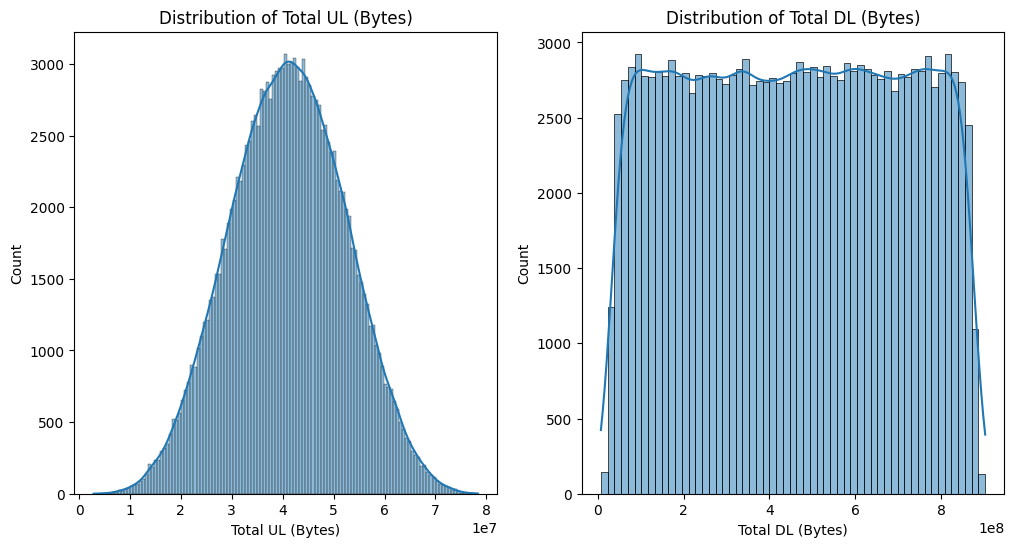

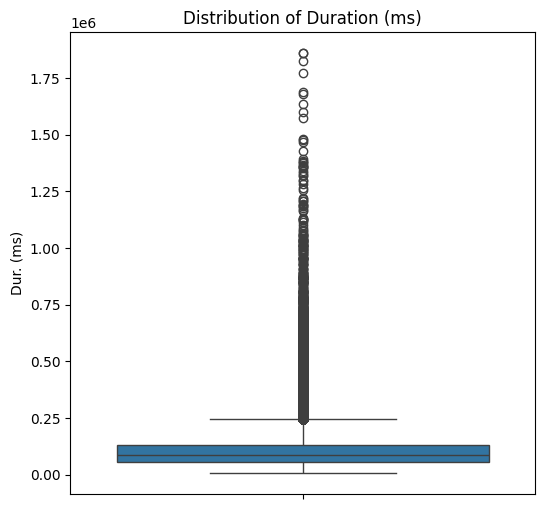

In [34]:
# prompt: Conduct a Graphical Univariate Analysis by identifying the most suitable plotting
#  options for each variable and interpreting your findings.

# Univariate Analysis for Numerical Features

# Histogram for Total UL (Uplink) and DL (Downlink)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Total UL (Bytes)'], kde=True)
plt.title('Distribution of Total UL (Bytes)')

plt.subplot(1, 2, 2)
sns.histplot(df['Total DL (Bytes)'], kde=True)
plt.title('Distribution of Total DL (Bytes)')
plt.show()

# Boxplot for Duration
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Dur. (ms)'])
plt.title('Distribution of Duration (ms)')
plt.show()

# Interpretation:
# - Total UL/DL:  Skewed distributions suggest most users have relatively low data usage,
#   with a few users responsible for a large portion of the overall data traffic.
# - Duration: Boxplot reveals potential outliers (long durations), indicating some calls/sessions
#   might be unusually longer than the average.

# Univariate Analysis for Categorical Features

# Interpretation:
# - Handset Manufacturer: Visualize the popularity of different handset brands. It helps
#   understand which brands are used most frequently by users.

# Bar plot for the most frequent occurring values
for column in df.select_dtypes(include='object'):
  if df[column].nunique() <= 10: # Limit to avoid overcrowding for very large categories
    plt.figure(figsize=(8, 4))
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Interpretation:
# - Observe the counts for each category of other categorical features. This helps identify the most
#   frequent categories and understand the distribution of values within those features.

**Finding Skewness of the DataSet**

In [35]:
# Calculate skewness for numerical features
skewness = df.select_dtypes(include=np.number).skew()
print(skewness)

Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952622
IMSI                                         41.124164
MSISDN/Number                               333.342413
IMEI                                          1.073519
Avg RTT DL (ms)                              69.705161
Avg RTT UL (ms)                              31.530109
Avg Bearer TP DL (kbps)                       2.589445
Avg Bearer TP UL (kbps)                       4.503428
TCP DL Retrans. Vol (Bytes)                  24.840677
TCP UL Retrans. Vol (Bytes)                 141.035684
DL TP < 50 Kbps (%)                          -2.303600
50 Kbps < DL TP < 250 Kbps (%)                3.279706
250 Kbps < DL TP < 1 Mbps (%)                 4.577678
DL TP > 1 Mbps (%)                            5.383899
UL TP < 10 Kbps (%)                          -9.008830
10 Kbps < UL TP < 50 Kbps (%)                10.972894
50 Kbps < 

**Post Null Value Treatment, DataSet Description**

In [36]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Start,150000,2019-04-26 12:36:38.953740032,2019-04-04 12:01:18,2019-04-25 00:26:00.750000128,2019-04-26 08:51:24.500000,2019-04-27 18:18:59.750000128,2019-04-29 07:28:43,NaN
Start ms,150001.0,499.1882,0.0,250.0,499.0,749.0,999.0,288.610872
End,150000,2019-04-27 17:40:08.059673344,2019-04-24 22:59:58,2019-04-26 07:30:11.500000,2019-04-27 23:02:05,2019-04-29 07:15:07.500000,2019-04-30 23:59:27,NaN
End ms,150001.0,498.80088,0.0,251.0,500.0,750.0,999.0,288.096693
Dur. (ms),150001.0,104608.560347,7142.0,57442.0,86399.0,132430.0,1859336.0,81037.351353
IMSI,150001.0,208201639651669.03125,204047108489451.0,208201401264956.0,208201546359072.0,208201771607314.0,214074303349628.0,21447224608.895241
MSISDN/Number,150001.0,41882819545.027359,33601001722.0,33651508781.0,33663797508.0,33684730950.0,882397108489451.0,2438731270479.143555
IMEI,150001.0,48474547977654.539062,440015202000.0,35462609538986.0,35722409972293.0,86119704277453.0,99001201327774.0,22373590654759.277344
Avg RTT DL (ms),150001.0,109.795706,0.0,35.0,54.0,109.795706,96923.0,559.34262
Avg RTT UL (ms),150001.0,17.662883,0.0,3.0,7.0,17.662883,7120.0,76.529933


**The top 10 handsets used by the customers**

In [38]:

top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


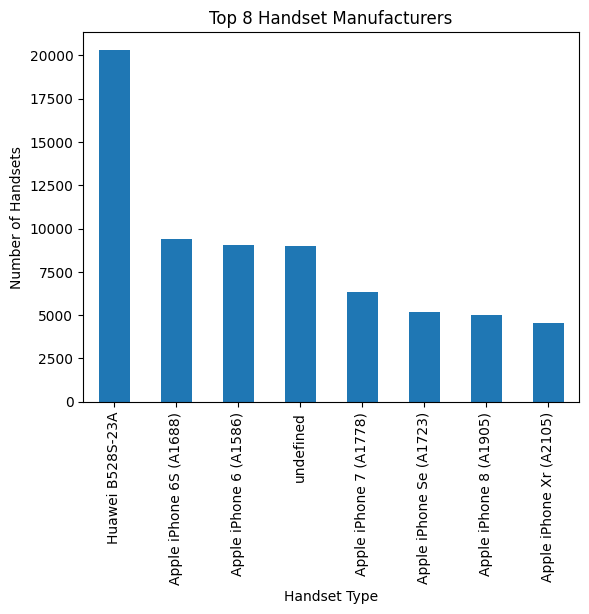

In [41]:
df['Handset Type'].value_counts().head(8).plot(kind='bar')
plt.xlabel('Handset Type')
plt.ylabel('Number of Handsets')
plt.title('Top 8 Handset Manufacturers')
plt.show()

**top 3 handset manufacturers**

In [42]:
top_3_handsets=df['Handset Manufacturer'].value_counts().head(3)
print(top_3_handsets)

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


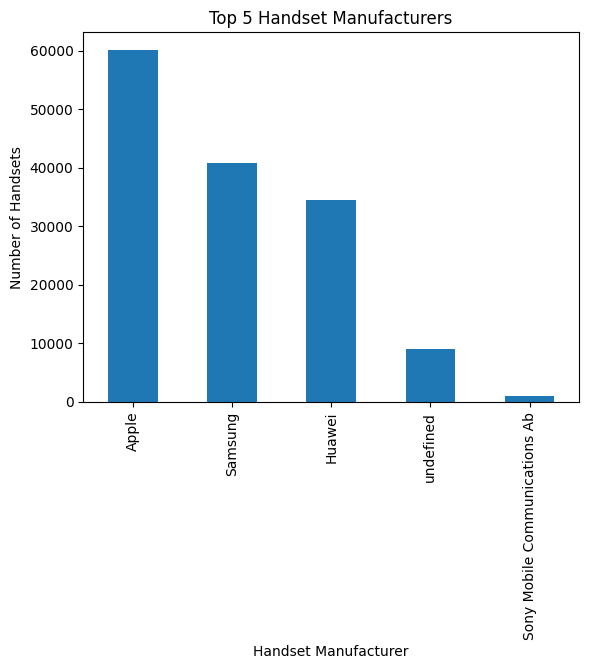

In [43]:
df['Handset Manufacturer'].value_counts().head(5).plot(kind='bar')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Number of Handsets')
plt.title('Top 5 Handset Manufacturers')
plt.show()

**Top 5 handsets per top 3 handset manufacturer**

In [44]:
# Group by Handset Manufacturer and then find the top 5 handsets for each manufacturer
top_5_handsets_per_manufacturer = df.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

# Filter for the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index.tolist()
top_5_handsets_top_3_manufacturers = top_5_handsets_per_manufacturer[top_5_handsets_per_manufacturer.index.get_level_values('Handset Manufacturer').isin(top_3_manufacturers)]

print(top_5_handsets_top_3_manufacturers)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

**Top 5 handsets per top 3 Manufacturers in bar plot**

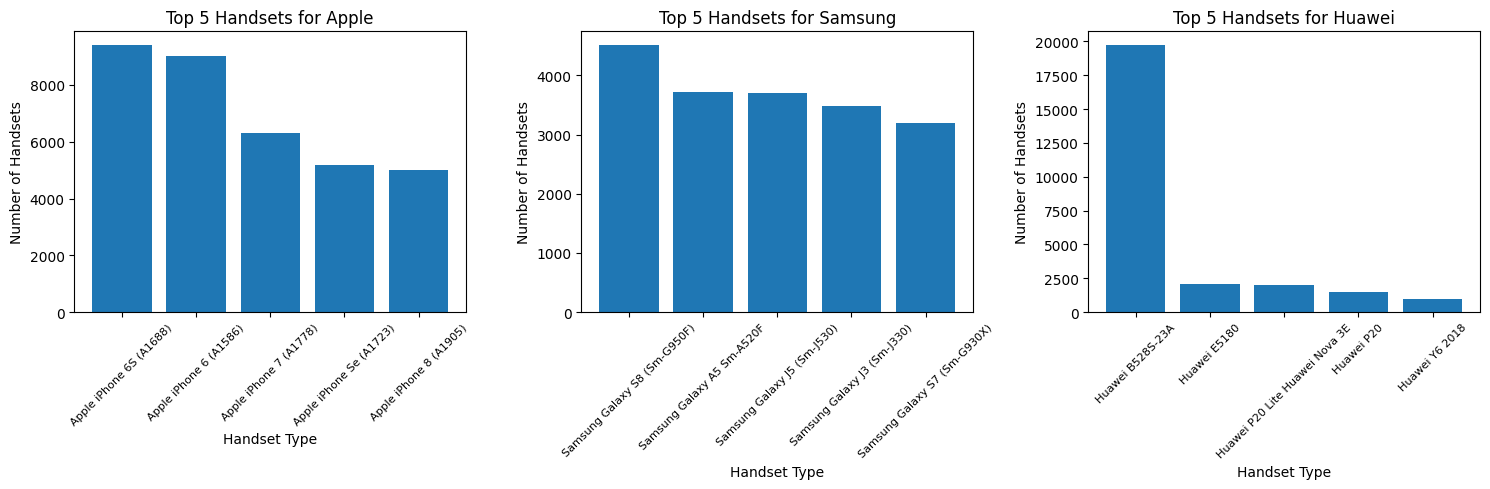

In [ ]:
# Group by Handset Manufacturer and then find the top 5 handsets for each manufacturer
top_5_handsets_per_manufacturer = df.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

# Filter for the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index.tolist()
top_5_handsets_top_3_manufacturers = top_5_handsets_per_manufacturer[top_5_handsets_per_manufacturer.index.get_level_values('Handset Manufacturer').isin(top_3_manufacturers)]

# Create subplots for each manufacturer
fig, axes = plt.subplots(1, len(top_3_manufacturers), figsize=(15, 5))

for i, manufacturer in enumerate(top_3_manufacturers):
  handsets = top_5_handsets_top_3_manufacturers[manufacturer]
  axes[i].bar(handsets.index.get_level_values('Handset Type'), handsets.values)
  axes[i].set_title(f'Top 5 Handsets for {manufacturer}')
  axes[i].set_xlabel('Handset Type')
  axes[i].set_ylabel('Number of Handsets')
  axes[i].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

In [ ]:
df['Handset Manufacturer'].value_counts()

,count
Handset Manufacturer,
Apple,60137
Samsung,40839
Huawei,34423
undefined,8987
Sony Mobile Communications Ab,980
...,...
Sintave Technology (Group) Co Ltd,1
Tianlong International (Hk) Co Ltd,1
Ovvi-Cellphone Tech. Inc.,1


**Task 1.1- Your employer wants to have an overview of the users’ behavior on those  applications.
● Aggregate per user the following information in the column
 ○ numberof xDRsessions
 ○ Session duration
 ○ the total download (DL) and upload (UL) data
 ○ thetotal data volume (in Bytes) during this session for each application**

In [ ]:
# prompt: use engagament on social media, YouTube,Netflix,Google,Email,Gaming,other both in Upload and download

# Assuming your DataFrame is named 'df' and it contains the necessary columns like 'Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', etc.

# Group by 'Bearer Id' and aggregate the information for each user
user_behavior = df.groupby('Bearer Id').agg({
    'Dur. (ms)': 'sum',  # Total session duration per user
    'Total DL (Bytes)': 'sum',  # Total download data per user
    'Total UL (Bytes)': 'sum'  # Total upload data per user
}).reset_index()


# Create columns for social media, YouTube, Netflix, Google, Email, Gaming, and other applications
user_behavior['Social Media DL (Bytes)'] = df.groupby('Bearer Id')['Social Media DL (Bytes)'].sum()
user_behavior['Social Media UL (Bytes)'] = df.groupby('Bearer Id')['Social Media UL (Bytes)'].sum()
user_behavior['YouTube DL (Bytes)'] = df.groupby('Bearer Id')['Youtube DL (Bytes)'].sum()
user_behavior['YouTube UL (Bytes)'] = df.groupby('Bearer Id')['Youtube UL (Bytes)'].sum()
user_behavior['Netflix DL (Bytes)'] = df.groupby('Bearer Id')['Netflix DL (Bytes)'].sum()
user_behavior['Netflix UL (Bytes)'] = df.groupby('Bearer Id')['Netflix UL (Bytes)'].sum()
user_behavior['Google DL (Bytes)'] = df.groupby('Bearer Id')['Google DL (Bytes)'].sum()
user_behavior['Google UL (Bytes)'] = df.groupby('Bearer Id')['Google UL (Bytes)'].sum()
user_behavior['Email DL (Bytes)'] = df.groupby('Bearer Id')['Email DL (Bytes)'].sum()
user_behavior['Email UL (Bytes)'] = df.groupby('Bearer Id')['Email UL (Bytes)'].sum()
user_behavior['Gaming DL (Bytes)'] = df.groupby('Bearer Id')['Gaming DL (Bytes)'].sum()
user_behavior['Gaming UL (Bytes)'] = df.groupby('Bearer Id')['Gaming UL (Bytes)'].sum()

# Calculate the total data volume (download + upload) for each application
# ...(Add similar lines for other applications as needed)


# You might need to handle cases where columns are missing.
# You can fill missing values with 0 or use a more appropriate method.

# Now 'user_behavior' DataFrame contains the aggregated information per user.

print(user_behavior)


                   Bearer Id     Dur. (ms)  Total DL (Bytes)  \
0        6917537518543529984  2.453400e+04      5.007220e+08   
1        6917537604825860096  2.148900e+04      7.095493e+08   
2        6917537608536819712  2.778600e+04      8.544659e+08   
3        6917537633966310400  1.563500e+04      8.257865e+08   
4        6917537638622189568  2.426400e+04      6.249578e+08   
...                      ...           ...               ...   
134704  13186541164985800704  1.452910e+05      3.870016e+08   
134705  13186541166737199104  8.639900e+04      8.726888e+08   
134706  13186541166776899584  8.639900e+04      3.863551e+08   
134707  13186541167134199808  1.031130e+05      3.272128e+08   
134708                        5.037679e+07      4.437555e+11   

        Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0           4.170461e+07                      NaN                      NaN   
1           3.869360e+07                      NaN                      NaN 

**Numberof xDRsessions per user and sort them on descending order**

In [ ]:
# prompt: numberof xDRsessions per user and sort them on descending order

# Assuming 'df' is your DataFrame

# Group by 'Bearer Id' and count the number of xDR sessions for each user
xDR_sessions_per_user = df.groupby('Bearer Id')['Dur. (ms)'].count().reset_index(name='Number of xDR Sessions')

# Sort the results in descending order of the number of xDR sessions
xDR_sessions_per_user = xDR_sessions_per_user.sort_values('Number of xDR Sessions', ascending=False)

print(xDR_sessions_per_user)

                   Bearer Id  Number of xDR Sessions
134708                                           991
103378  13042425979269199872                      16
88125   13042425965944199168                      10
103736  13042425981873399808                       9
93908   13042425972278300672                       9
...                      ...                     ...
45507    7349883251186700288                       1
45506    7349883251186629632                       1
45505    7349883251186599936                       1
45504    7349883251186589696                       1
67354    7349883261406010368                       1

[134709 rows x 2 columns]


In [ ]:
df.loc[134708]

,134708
Bearer Id,13114483572136300544
Start,2019-04-28 21:42:46
Start ms,390.0
End,2019-04-30 06:39:18
End ms,77.0
Dur. (ms),118591.0
IMSI,208201402048001.0
MSISDN/Number,33609984109.0
IMEI,35202407829217.0
Last Location Name,T88492A


**Total Session Duration based on Bearer Id and sort them in Descending Order**

In [ ]:
# prompt: Session Duration per user

# Calculate session duration per user
session_duration_per_user = df.groupby('Bearer Id')['Dur. (ms)'].sum().reset_index(name='Total Session Duration').sort_values('Total Session Duration',ascending=False)

# Print the results
print(session_duration_per_user)

                   Bearer Id  Total Session Duration
134708                                  5.037679e+07
119993  13114483561758900224            5.659733e+06
93669   13042425972205000704            4.838428e+06
102580  13042425978965499904            3.990246e+06
99790   13042425975793299456            3.667444e+06
...                      ...                     ...
13681    7277825656116110336            7.284000e+03
1101     6917537685489510400            7.267000e+03
43       6917537673690099712            7.258000e+03
31       6917537669513839616            7.146000e+03
82431   13042425959676700672            7.142000e+03

[134709 rows x 2 columns]


In [ ]:
# prompt: thetotal download (DL) and upload (UL) data per user and sort them in descending order

# Calculate total download and upload data per user
total_dl_ul_per_user = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
total_dl_ul_per_user = total_dl_ul_per_user.rename(columns={
    'Total DL (Bytes)': 'Total DL',
    'Total UL (Bytes)': 'Total UL'
})

# Sort the results in descending order of total download data
total_dl_ul_per_user = total_dl_ul_per_user.sort_values(['Total DL', 'Total UL'], ascending=[False, False])

print(total_dl_ul_per_user)

                   Bearer Id      Total DL      Total UL
134708                        4.437555e+11  4.057298e+10
103378  13042425979269199872  6.288470e+09  7.021455e+08
93908   13042425972278300672  5.396236e+09  4.128648e+08
99394   13042425975039100928  4.578676e+09  3.748423e+08
88125   13042425965944199168  4.548797e+09  4.215314e+08
...                      ...           ...           ...
111642  13114483554777399296  9.455608e+06  2.454402e+07
15756    7277825656822330368  9.275626e+06  4.519985e+07
118321  13114483560085399552  9.199518e+06  4.059600e+07
22470    7277825664644849664  9.046209e+06  2.420280e+07
58811    7349883258820330496  8.827082e+06  4.868476e+07

[134709 rows x 3 columns]


In [ ]:
# prompt: thetotal data volume (in Bytes) during this session for each Bearer Id and show only Bearer Id and total data volume in output

# Calculate total data volume (download + upload) for each Bearer Id
total_data_volume_per_bearer = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume (DL + UL)
total_data_volume_per_bearer['Total Data Volume'] = total_data_volume_per_bearer['Total DL (Bytes)'] + total_data_volume_per_bearer['Total UL (Bytes)']

# Select only Bearer Id and total data volume
total_data_volume_per_bearer = total_data_volume_per_bearer[['Bearer Id', 'Total Data Volume']].sort_values('Total Data Volume',ascending=False)

print(total_data_volume_per_bearer)

                   Bearer Id  Total Data Volume
134708                             4.843285e+11
103378  13042425979269199872       6.990615e+09
93908   13042425972278300672       5.809100e+09
88125   13042425965944199168       4.970328e+09
99394   13042425975039100928       4.953519e+09
...                      ...                ...
67796    7349883261658779648       3.614993e+07
111642  13114483554777399296       3.399962e+07
107433  13114483551116199936       3.357584e+07
22470    7277825664644849664       3.324901e+07
107084  13114483550934099968       2.895611e+07

[134709 rows x 2 columns]


**Plot the tope 5 Bearer Id and their Data Volume consumption**

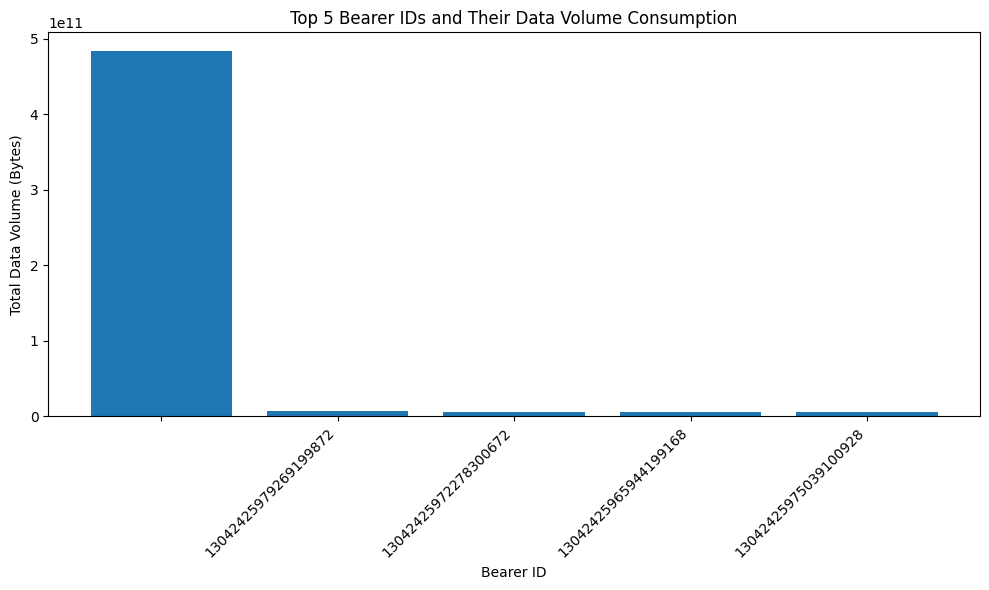

In [ ]:
# Get the top 5 Bearer IDs with the highest data volume consumption
top_5_bearers = total_data_volume_per_bearer.nlargest(5, 'Total Data Volume')

# Convert 'Bearer Id' column to string type
top_5_bearers['Bearer Id'] = top_5_bearers['Bearer Id'].astype(str)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_bearers['Bearer Id'], top_5_bearers['Total Data Volume'])
plt.xlabel('Bearer ID')
plt.ylabel('Total Data Volume (Bytes)')
plt.title('Top 5 Bearer IDs and Their Data Volume Consumption')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

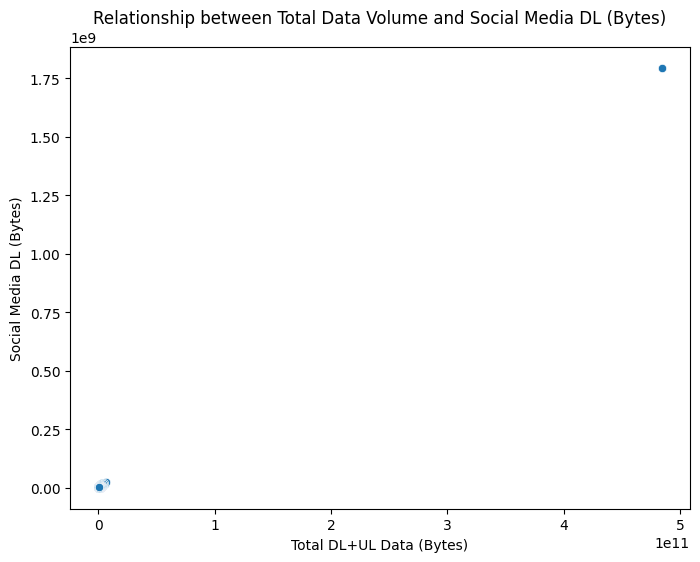

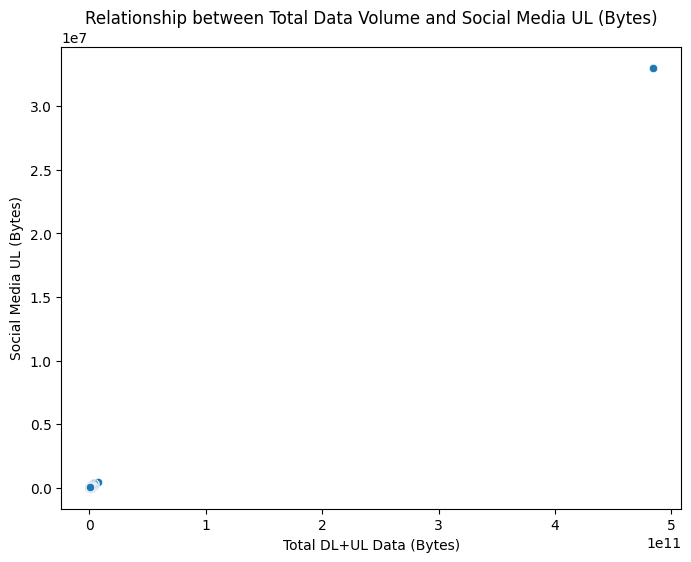

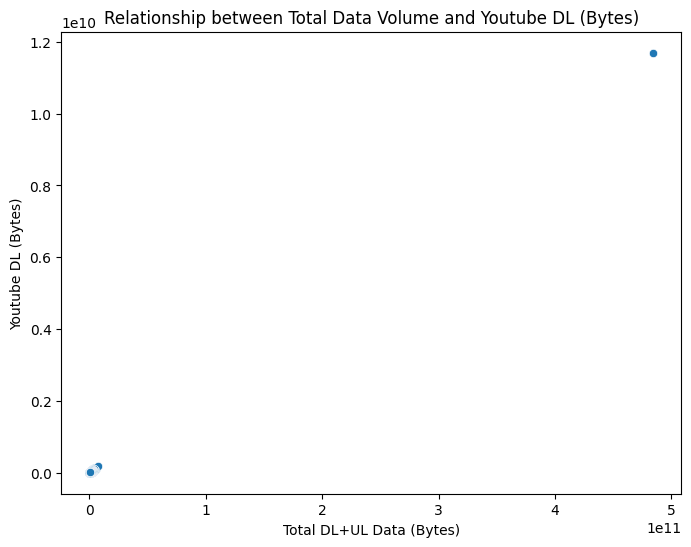

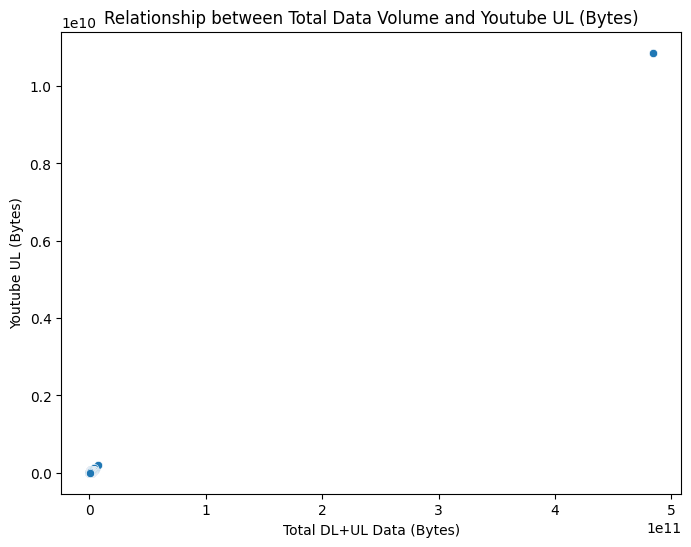

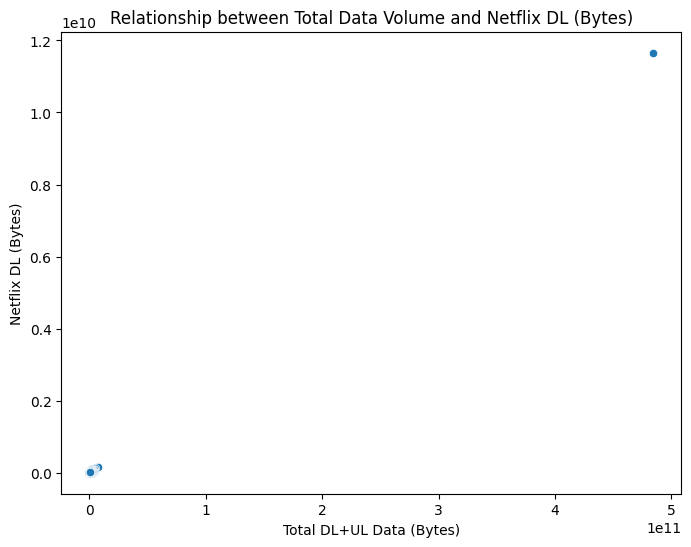

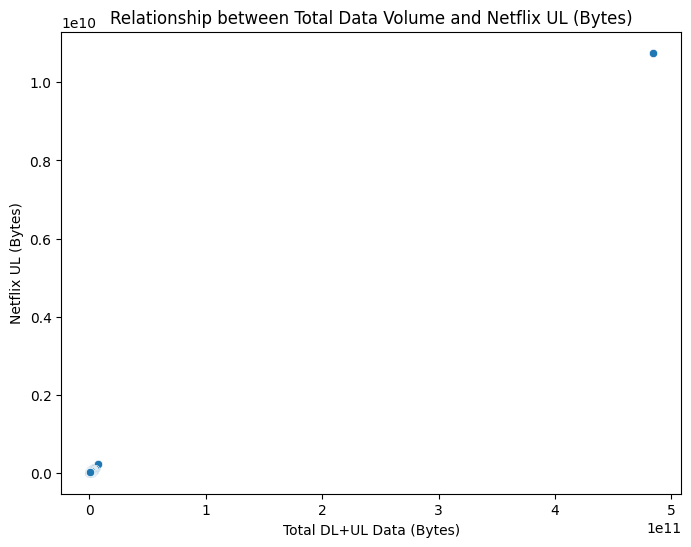

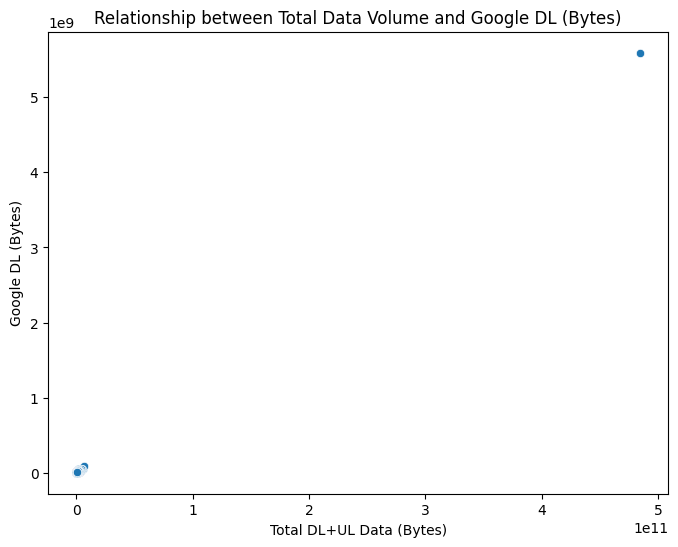

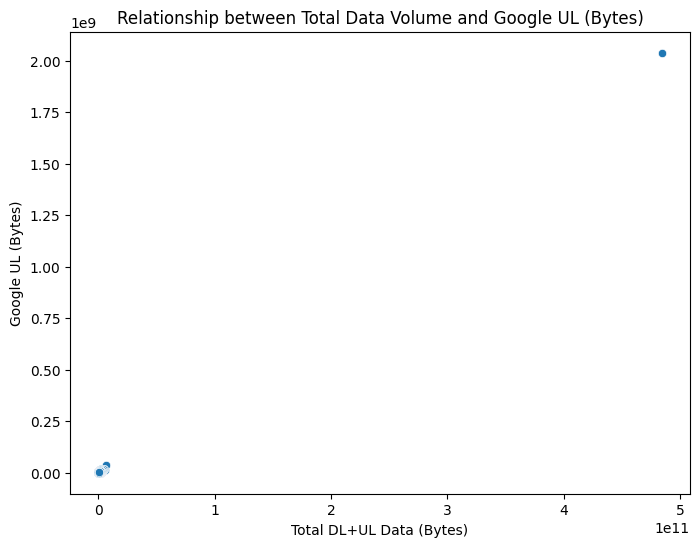

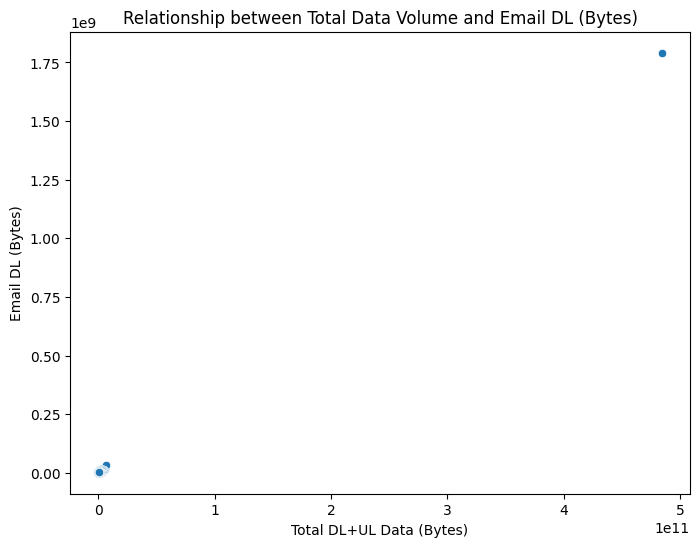

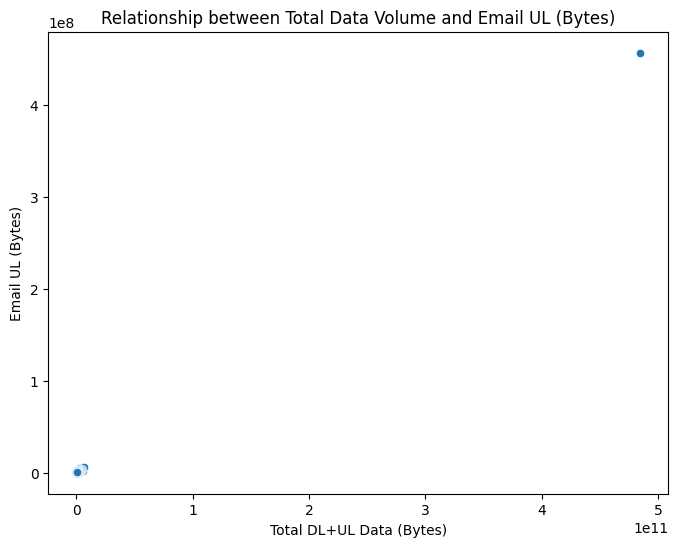

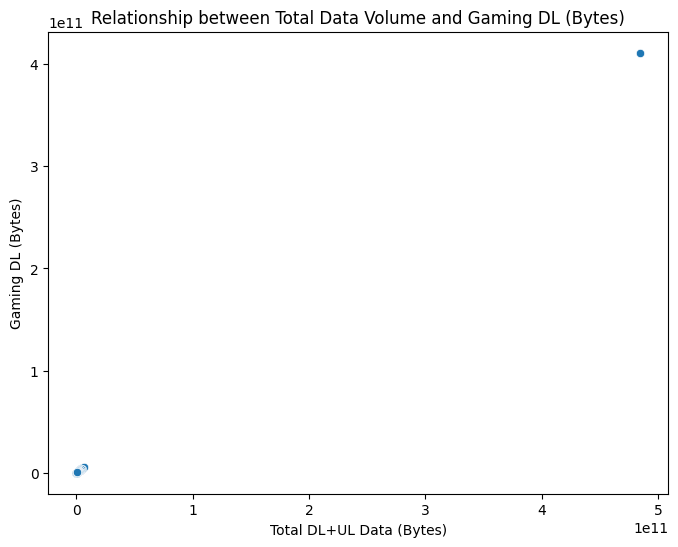

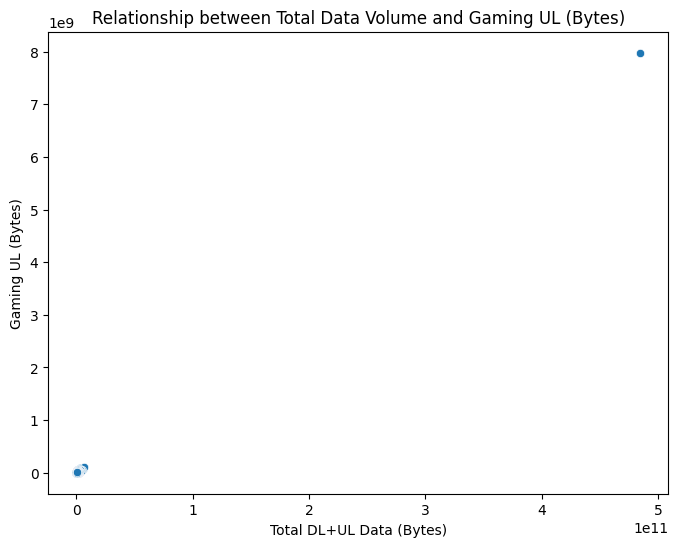

Correlation Matrix for Gaming UL (Bytes):
                   Total Data Volume  Gaming UL (Bytes)
Total Data Volume           1.000000           0.958039
Gaming UL (Bytes)           0.958039           1.000000



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df'

# Create a new DataFrame with total DL+UL data per Bearer Id
total_dl_ul_per_user = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_dl_ul_per_user['Total Data Volume'] = total_dl_ul_per_user['Total DL (Bytes)'] + total_dl_ul_per_user['Total UL (Bytes)']

# Create a scatter plot for each application against total DL+UL data
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'
]

for app_col in application_columns:
    # Aggregate application data per Bearer Id
    app_data_per_user = df.groupby('Bearer Id')[app_col].sum().reset_index()

    # Merge with total DL+UL data
    merged_df = pd.merge(total_dl_ul_per_user, app_data_per_user, on='Bearer Id')

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Total Data Volume', y=app_col, data=merged_df)
    plt.xlabel('Total DL+UL Data (Bytes)')
    plt.ylabel(app_col)
    plt.title(f'Relationship between Total Data Volume and {app_col}')
    plt.show()


# Calculate and print the correlation matrix
correlation_matrix = merged_df[['Total Data Volume', app_col]].corr()
print(f"Correlation Matrix for {app_col}:\n{correlation_matrix}\n")

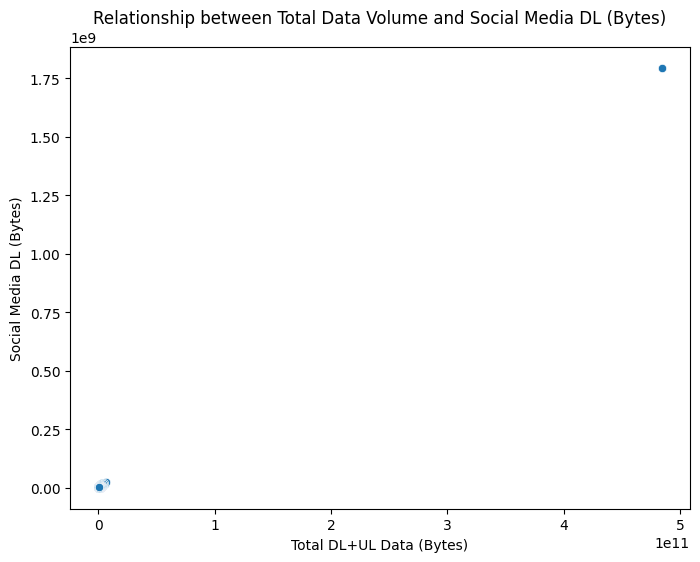

Correlation Matrix for Social Media DL (Bytes):
                         Total Data Volume  Social Media DL (Bytes)
Total Data Volume                 1.000000                 0.959072
Social Media DL (Bytes)           0.959072                 1.000000



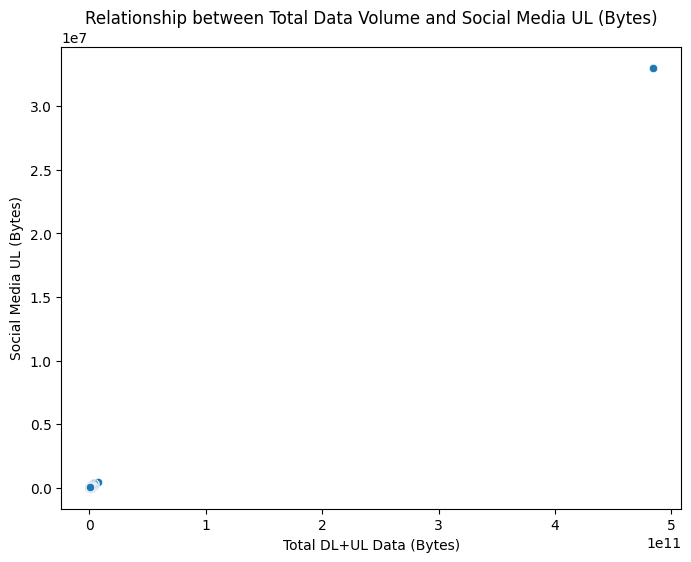

Correlation Matrix for Social Media UL (Bytes):
                         Total Data Volume  Social Media UL (Bytes)
Total Data Volume                 1.000000                 0.958854
Social Media UL (Bytes)           0.958854                 1.000000



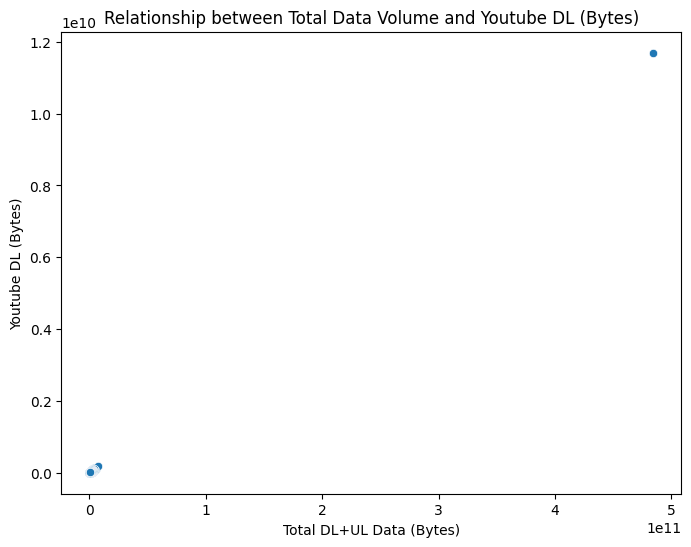

Correlation Matrix for Youtube DL (Bytes):
                    Total Data Volume  Youtube DL (Bytes)
Total Data Volume            1.000000            0.960069
Youtube DL (Bytes)           0.960069            1.000000



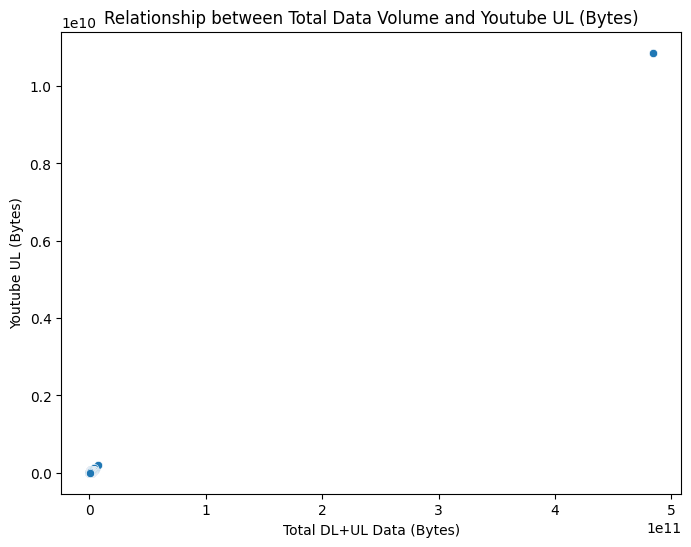

Correlation Matrix for Youtube UL (Bytes):
                    Total Data Volume  Youtube UL (Bytes)
Total Data Volume            1.000000            0.959209
Youtube UL (Bytes)           0.959209            1.000000



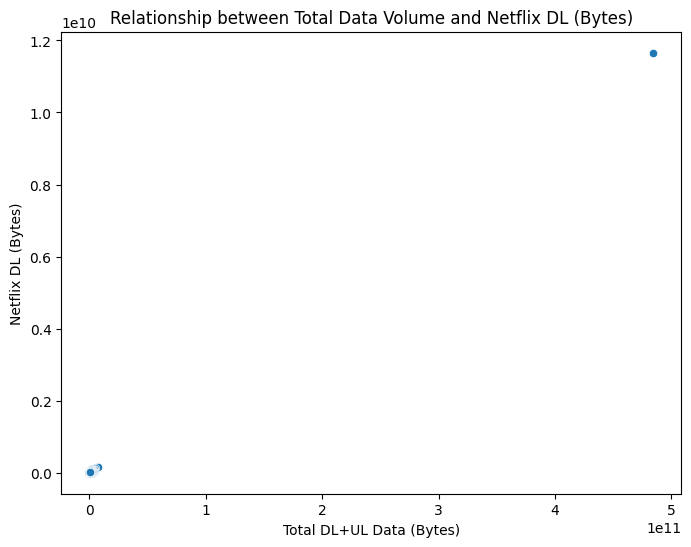

Correlation Matrix for Netflix DL (Bytes):
                    Total Data Volume  Netflix DL (Bytes)
Total Data Volume            1.000000            0.959823
Netflix DL (Bytes)           0.959823            1.000000



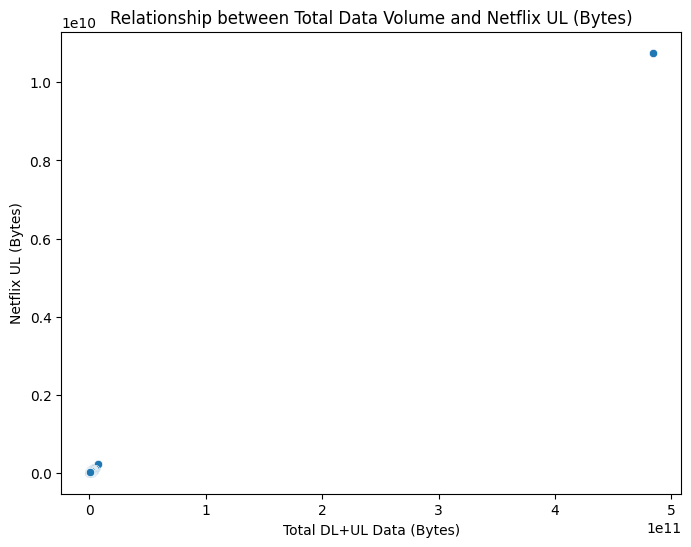

Correlation Matrix for Netflix UL (Bytes):
                    Total Data Volume  Netflix UL (Bytes)
Total Data Volume            1.000000            0.958821
Netflix UL (Bytes)           0.958821            1.000000



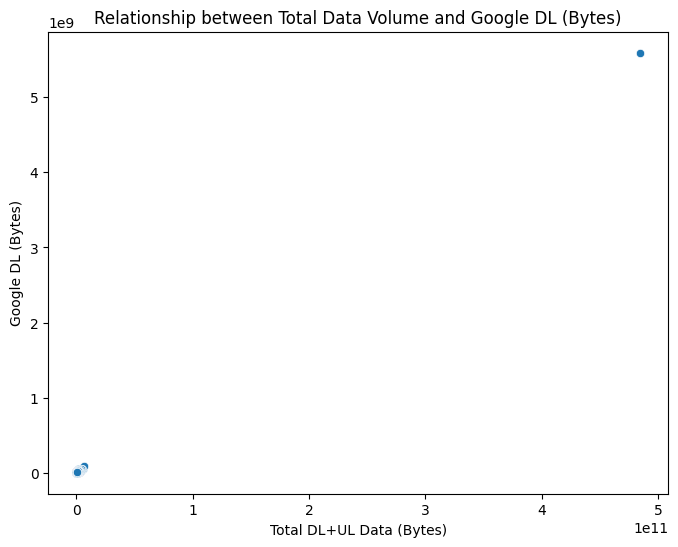

Correlation Matrix for Google DL (Bytes):
                   Total Data Volume  Google DL (Bytes)
Total Data Volume           1.000000           0.958352
Google DL (Bytes)           0.958352           1.000000



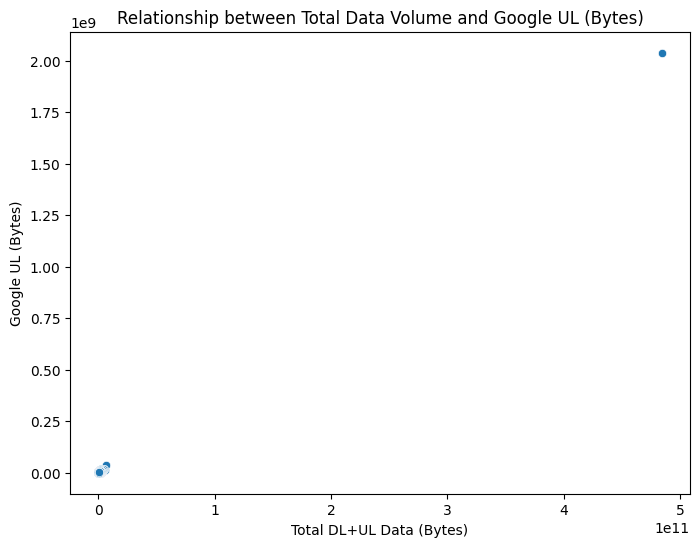

Correlation Matrix for Google UL (Bytes):
                   Total Data Volume  Google UL (Bytes)
Total Data Volume           1.000000           0.958526
Google UL (Bytes)           0.958526           1.000000



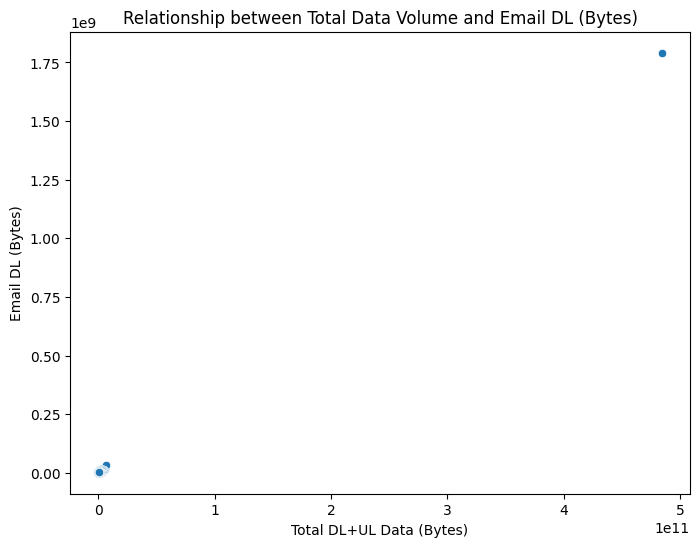

Correlation Matrix for Email DL (Bytes):
                   Total Data Volume  Email DL (Bytes)
Total Data Volume           1.000000          0.958992
Email DL (Bytes)            0.958992          1.000000



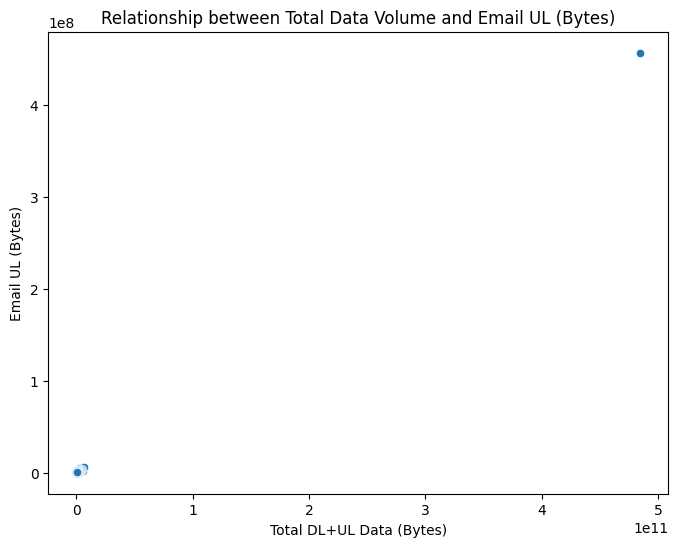

Correlation Matrix for Email UL (Bytes):
                   Total Data Volume  Email UL (Bytes)
Total Data Volume           1.000000          0.957624
Email UL (Bytes)            0.957624          1.000000



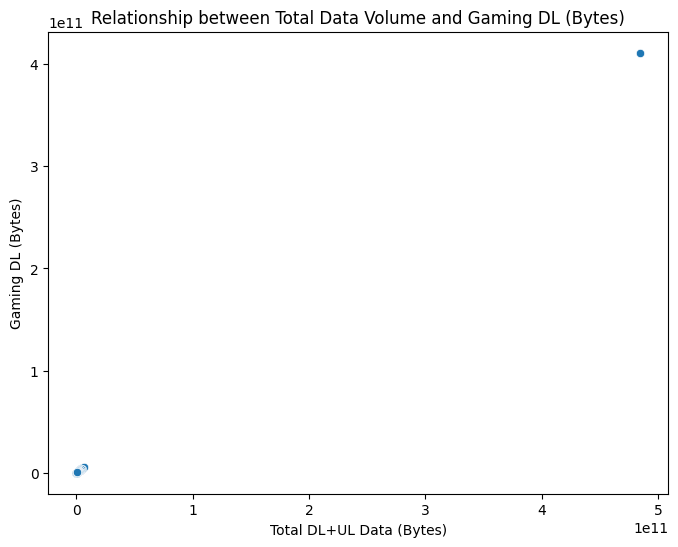

Correlation Matrix for Gaming DL (Bytes):
                   Total Data Volume  Gaming DL (Bytes)
Total Data Volume           1.000000           0.999393
Gaming DL (Bytes)           0.999393           1.000000



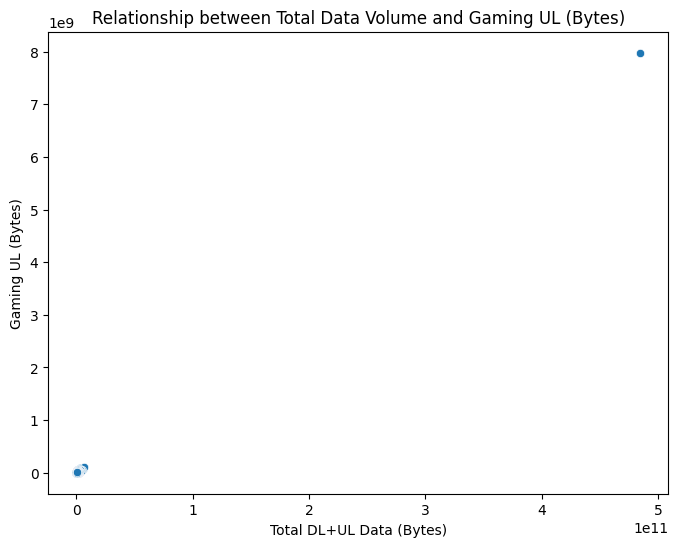

Correlation Matrix for Gaming UL (Bytes):
                   Total Data Volume  Gaming UL (Bytes)
Total Data Volume           1.000000           0.958039
Gaming UL (Bytes)           0.958039           1.000000



In [ ]:
# prompt:  Bivariate Analysis– explore the relationship between  Social Media,  Google, Email, YouTube, Netflix, Gaming ,other application  Upload, Download, and total bytes & the total
#  DL+UL data  and interpret your findings

# Create a new DataFrame with total DL+UL data per Bearer Id
total_dl_ul_per_user = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_dl_ul_per_user['Total Data Volume'] = total_dl_ul_per_user['Total DL (Bytes)'] + total_dl_ul_per_user['Total UL (Bytes)']

# Create a scatter plot for each application against total DL+UL data
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'
]

for app_col in application_columns:
    # Aggregate application data per Bearer Id
    app_data_per_user = df.groupby('Bearer Id')[app_col].sum().reset_index()

    # Merge with total DL+UL data
    merged_df = pd.merge(total_dl_ul_per_user, app_data_per_user, on='Bearer Id')

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Total Data Volume', y=app_col, data=merged_df)
    plt.xlabel('Total DL+UL Data (Bytes)')
    plt.ylabel(app_col)
    plt.title(f'Relationship between Total Data Volume and {app_col}')
    plt.show()


    # Calculate and print the correlation matrix
    correlation_matrix = merged_df[['Total Data Volume', app_col]].corr()
    print(f"Correlation Matrix for {app_col}:\n{correlation_matrix}\n")

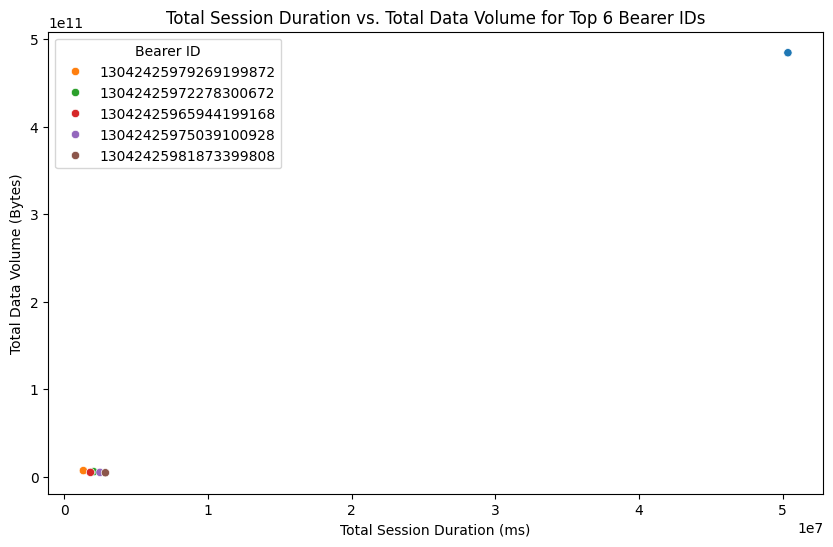

In [ ]:
# prompt:  Plot between total duration spent and total data volume consumption for top 6 bearer Id as hue point

# Assuming your DataFrame is named 'df'

# Calculate total data volume (DL + UL) for each Bearer Id
total_data_volume_per_bearer = df.groupby('Bearer Id').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_data_volume_per_bearer['Total Data Volume'] = total_data_volume_per_bearer['Total DL (Bytes)'] + total_data_volume_per_bearer['Total UL (Bytes)']

# Calculate total session duration per Bearer Id
total_session_duration_per_bearer = df.groupby('Bearer Id')['Dur. (ms)'].sum().reset_index(name='Total Session Duration')

# Merge the two DataFrames on 'Bearer Id'
merged_df = pd.merge(total_data_volume_per_bearer, total_session_duration_per_bearer, on='Bearer Id')

# Get the top 6 Bearer IDs with the highest data volume
top_6_bearers = merged_df.nlargest(6, 'Total Data Volume')

# Create a scatter plot with hue for top 6 Bearer Ids
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Session Duration', y='Total Data Volume', hue='Bearer Id', data=top_6_bearers)
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Total Data Volume (Bytes)')
plt.title('Total Session Duration vs. Total Data Volume for Top 6 Bearer IDs')
plt.legend(title='Bearer ID', loc='best')
plt.show()

In [ ]:
# prompt:  Variable transformations– segment the users into the top five decile classes
#  based on the total duration for all sessions and compute the total data (DL+UL)
#  per decile class.

# Assuming 'total_data_volume_per_bearer' DataFrame contains 'Bearer Id' and 'Total Data Volume'
total_data_volume_per_bearer['Decile Class'] = pd.qcut(total_data_volume_per_bearer['Total Data Volume'], 5, labels=False)

# Group by decile class and calculate the total data volume per class
total_data_per_decile = total_data_volume_per_bearer.groupby('Decile Class')['Total Data Volume'].sum().reset_index()

print(total_data_per_decile)

   Decile Class  Total Data Volume
0             0       4.426663e+12
1             1       9.395644e+12
2             2       1.427454e+13
3             3       1.902679e+13
4             4       2.724156e+13


In [ ]:
# prompt:  Dimensionality Reduction– perform a principal component analysis to reduce the
#  dimensions of your data to 15 PCA components and provide a useful interpretation of the results

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for PCA
numerical_features = df.select_dtypes(include=np.number)

# Standardize the data
x = StandardScaler().fit_transform(numerical_features)

# Apply PCA with 15 components
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
print("Total Explained Variance:", np.sum(explained_variance_ratio))

# Loadings (contribution of each original feature to each principal component)
loadings = pd.DataFrame(pca.components_.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(15)])
print("Loadings:\n", loadings)

# Interpretation:
# - Examine the explained variance ratio to see how much variance each principal component captures.
# - Look at the loadings to understand which original features contribute most strongly to each principal component.
# - You can interpret the principal components as new features that represent combinations of the original features, capturing the most important patterns in your data.
# Example interpretation:
# - If PC1 has high positive loadings on "Total DL (Bytes)" and "Total UL (Bytes)", it might represent the overall data usage of the user.
# - If PC2 has high positive loadings on "Social Media DL (Bytes)" and "Social Media UL (Bytes)", it might represent the social media usage of the user.

Explained Variance Ratio: [0.15338629 0.06019813 0.05021043 0.04086405 0.04067707 0.03568415
 0.03441029 0.03229452 0.02986008 0.02857067 0.02324821 0.02288705
 0.02082281 0.02069584 0.02062525]
Total Explained Variance: 0.6144348467933572
Loadings:
                                                PC1       PC2       PC3  \
Start ms                                  0.000056 -0.000630  0.002906   
End ms                                    0.000624 -0.001571 -0.001750   
Dur. (ms)                                -0.056358  0.088093  0.437984   
IMSI                                      0.000431 -0.003097 -0.017732   
MSISDN/Number                            -0.000797  0.003352  0.021410   
IMEI                                      0.179307 -0.068405  0.031581   
Avg RTT DL (ms)                           0.001704 -0.004223 -0.022728   
Avg RTT UL (ms)                           0.041890  0.023446  0.017705   
Avg Bearer TP DL (kbps)                   0.217814 -0.118102 -0.217805   
Avg Beare

**Correlation Analysis– compute a correlation matrix for the following variables
 and interpret your findings: Social Media data, Google data, Email data, YouTube  data, Netflix data, Gaming data, and Other data**

                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000555   
Social Media UL (Bytes)                -0.000555                 1.000000   
Google DL (Bytes)                      -0.001954                 0.003542   
Google UL (Bytes)                       0.000186                 0.001085   
Email DL (Bytes)                        0.004745                 0.004823   
Email UL (Bytes)                       -0.002518                -0.001427   
Youtube DL (Bytes)                     -0.001389                -0.001786   
Youtube UL (Bytes)                      0.002345                -0.002368   
Netflix DL (Bytes)                     -0.001817                -0.000772   
Netflix UL (Bytes)                      0.003457                -0.002493   
Gaming DL (Bytes)                       0.001018                 0.000210   
Gaming UL (Bytes)                       0.003095                 0.000844   

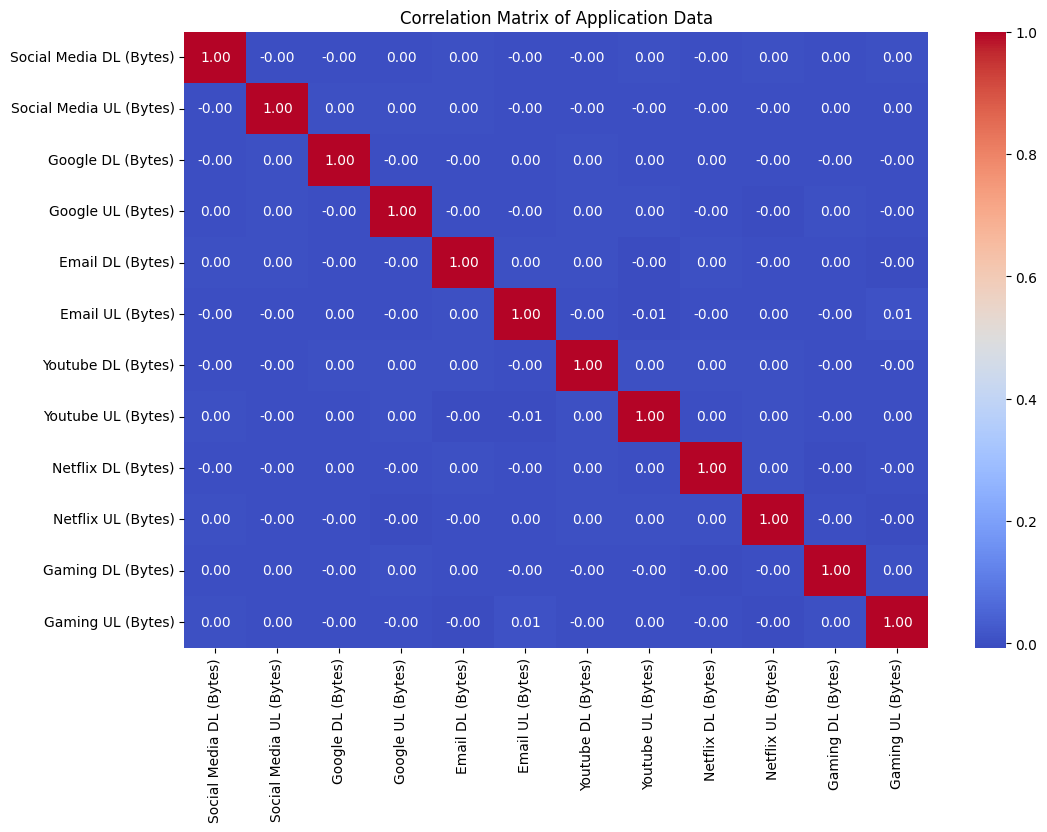

In [ ]:
# prompt: Correlation Analysis– compute a correlation matrix for the following variables
#  and interpret your findings: Social Media data, Google data, Email data, YouTube
#  data, Netflix data, Gaming data, and Other data

# Select the relevant columns for correlation analysis
data_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                'Google DL (Bytes)', 'Google UL (Bytes)',
                'Email DL (Bytes)', 'Email UL (Bytes)',
                'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                'Gaming DL (Bytes)', 'Gaming UL (Bytes)']

# Create a correlation matrix for these columns
correlation_matrix = df[data_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Application Data')
plt.show()

In [ ]:
# prompt: thetotal data volume (in Bytes) during this session for Social Media, YouTube, Netflix, Google, Email, Gaming, other . Each find it separately

# Calculate the total data volume (download + upload) for each application
user_behavior['Social Media Total (Bytes)'] = user_behavior['Social Media DL (Bytes)'] + user_behavior['Social Media UL (Bytes)']
user_behavior['YouTube Total (Bytes)'] = user_behavior['YouTube DL (Bytes)'] + user_behavior['YouTube UL (Bytes)']
user_behavior['Netflix Total (Bytes)'] = user_behavior['Netflix DL (Bytes)'] + user_behavior['Netflix UL (Bytes)']
user_behavior['Google Total (Bytes)'] = user_behavior['Google DL (Bytes)'] + user_behavior['Google UL (Bytes)']
user_behavior['Email Total (Bytes)'] = user_behavior['Email DL (Bytes)'] + user_behavior['Email UL (Bytes)']
user_behavior['Gaming Total (Bytes)'] = user_behavior['Gaming DL (Bytes)'] + user_behavior['Gaming UL (Bytes)']

# Calculate the total data volume for "other" applications (you might need to define this based on your data)
other_dl_bytes = df['Total DL (Bytes)'].sum() - (user_behavior['Social Media DL (Bytes)'].sum() + user_behavior['YouTube DL (Bytes)'].sum() + user_behavior['Netflix DL (Bytes)'].sum() + user_behavior['Google DL (Bytes)'].sum() + user_behavior['Email DL (Bytes)'].sum() + user_behavior['Gaming DL (Bytes)'].sum())
other_ul_bytes = df['Total UL (Bytes)'].sum() - (user_behavior['Social Media UL (Bytes)'].sum() + user_behavior['YouTube UL (Bytes)'].sum() + user_behavior['Netflix UL (Bytes)'].sum() + user_behavior['Google UL (Bytes)'].sum() + user_behavior['Email UL (Bytes)'].sum() + user_behavior['Gaming UL (Bytes)'].sum())
user_behavior['Other Total (Bytes)'] = other_dl_bytes + other_ul_bytes

# Print the total data volume for each application
print("Total Data Volume for Social Media:", user_behavior['Social Media Total (Bytes)'].sum())
print("Total Data Volume for YouTube:", user_behavior['YouTube Total (Bytes)'].sum())
print("Total Data Volume for Netflix:", user_behavior['Netflix Total (Bytes)'].sum())
print("Total Data Volume for Google:", user_behavior['Google Total (Bytes)'].sum())
print("Total Data Volume for Email:", user_behavior['Email Total (Bytes)'].sum())
print("Total Data Volume for Gaming:", user_behavior['Gaming Total (Bytes)'].sum())
print("Total Data Volume for Other:", user_behavior['Other Total (Bytes)'].sum())

Total Data Volume for Social Media: 0.0
Total Data Volume for YouTube: 0.0
Total Data Volume for Netflix: 0.0
Total Data Volume for Google: 0.0
Total Data Volume for Email: 0.0
Total Data Volume for Gaming: 0.0
Total Data Volume for Other: 1.001766054409504e+19


In [ ]:
# prompt: thetotal data volume (in Bytes) , upload and download separately for each Bearer on  YouTube  and sort the Bearer descending order based on total data volume

# Calculate the total data volume (download + upload) for YouTube for each Bearer ID
user_behavior['YouTube Total (Bytes)'] = user_behavior['YouTube DL (Bytes)'] + user_behavior['YouTube UL (Bytes)']

# Create a new DataFrame with only the Bearer ID and YouTube Total data volume
youtube_data = user_behavior[['Bearer Id', 'YouTube Total (Bytes)']].copy()

# Sort the DataFrame in descending order based on the YouTube Total data volume
youtube_data_sorted = youtube_data.sort_values('YouTube Total (Bytes)', ascending=False)

# Display the sorted DataFrame
print(youtube_data_sorted)

# You can further process this data to get the upload and download volumes separately
# if you need that level of detail.

                   Bearer Id  YouTube Download (Bytes)  \
0        6917537518543529984              6.139644e+06   
1        6917537604825860096              1.028122e+07   
2        6917537608536819712              5.385159e+06   
3        6917537633966310400              1.234702e+07   
4        6917537638622189568              1.523182e+07   
...                      ...                       ...   
134704  13186541164985800704              2.214792e+07   
134705  13186541166737199104              1.187906e+07   
134706  13186541166776899584              2.216380e+07   
134707  13186541167134199808              1.209932e+07   
134708                                    1.169394e+10   

        YouTube Upload (Bytes)  YouTube Total (Bytes)  
0                 2.071526e+06           8.211170e+06  
1                 1.811998e+07           2.840120e+07  
2                 4.295851e+06           9.681010e+06  
3                 1.108953e+07           2.343655e+07  
4                 8.401